8 10 0.3385070659515793
10 12 0.33894742582142195
12 16 0.3389259219815721
16 24 0.3384332658007323
24 32 0.3386715456022295
[0.33869704503150705] [0.0024329389143553292]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

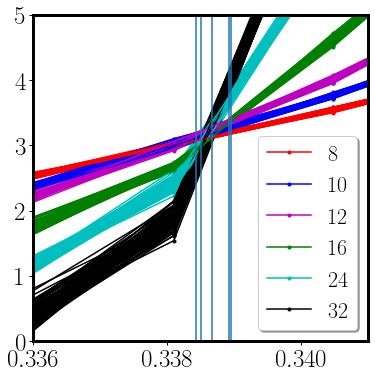

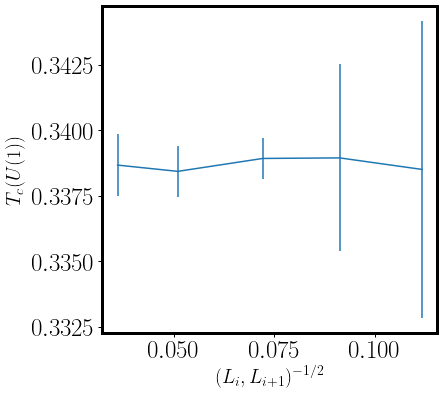

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit


plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

bare_Tc=[]
bare_Tc_err=[]
nu_list=[]
e=0
nu=0
h=1
rho=1
eta1=0
eta2=1
blow=0.3
bhigh=0.45
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.336, 0.341)
ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1] + L[l1]*err_J_sum))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.37635107192807715
10 12 0.3769007414013615
12 16 0.3772408254049566
16 24 0.3764707883824467
24 32 0.3761718976678327
[0.33869704503150705, 0.37662706495693493] [0.0024329389143553292, 0.00044751962418349467]


<ErrorbarContainer object of 3 artists>

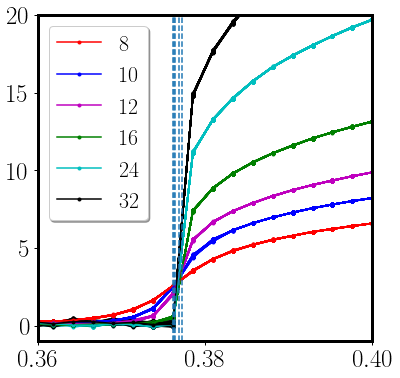

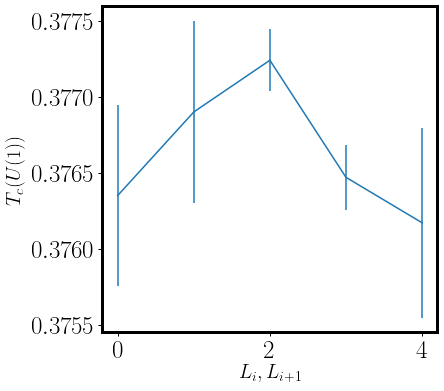

In [230]:
e=0
nu=0.4
h=1
rho=1
eta1=0
eta2=1
blow=0.3
bhigh=0.45
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L)+1)))
c_m=next(color)

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.36, 0.4)
ax1.set_ylim((-1,20))

from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1] + L[l1]*err_J_sum))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]

for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]), ls="--")
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("$L_{i}, L_{i+1}$")
pair_l=[]

pair_l=np.arange(0,len(L)-1, 1 )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )

8 10 0.39565244203606925
10 12 0.3953681379468048
12 16 0.39594780255879974
16 24 0.39665609892077264
24 32 0.39640810299603985
[0.33869704503150705, 0.37662706495693493, 0.3960065168916972] [0.0024329389143553292, 0.00044751962418349467, 0.0008985596276119891]


<ErrorbarContainer object of 3 artists>

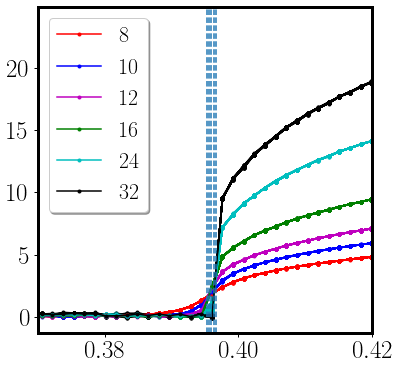

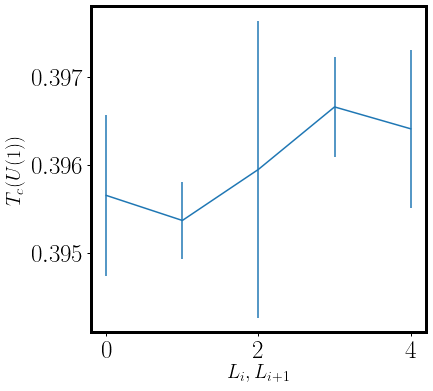

In [231]:
e=0
nu=0.5
h=1
rho=1
eta1=0
eta2=1
blow=0.35
bhigh=0.45
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L)+1)))
c_m=next(color)

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.37, 0.42)
#ax1.set_ylim((-1,1))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
        if(n==0): ax1.legend(loc='best')
        #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1] + 0*L[l1]*err_J_sum))[0]
            if(condition.size>0):
                index1=condition[-1]
                index2=index1+1
                x1= beta[index1]
                y1= Js_cross[n,index1, l1]
                x2= beta[index2] 
                y2=Js_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= Js_cross[n,index1, l2]
                y2=Js_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")

betac_finitesize=[]
err_betac_finitesize=[]

for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]), ls="--")
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("$L_{i}, L_{i+1}$")
pair_l=[]

pair_l=np.arange(0,len(L)-1, 1 )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )

8 10 0.4005193832766292
10 12 0.4005473816639091
12 16 0.4004966323298392
16 24 0.39978680045570447
24 32 0.3984860090563156
[0.33869704503150705, 0.37662706495693493, 0.3960065168916972, 0.3999672413564795] [0.0024329389143553292, 0.00044751962418349467, 0.0008985596276119891, 0.005999984246694651]


<ErrorbarContainer object of 3 artists>

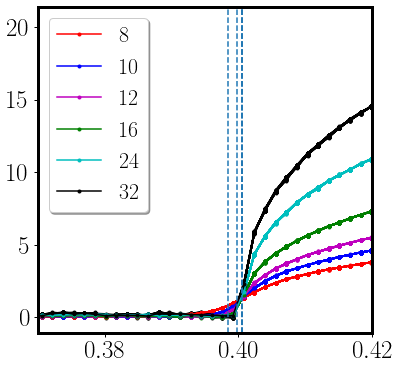

IndexError: index out of range

<Figure size 432x432 with 1 Axes>

In [232]:
e=0
nu=0.525
h=1
rho=1
eta1=0
eta2=1
blow=0.35
bhigh=0.45
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L)+1)))
c_m=next(color)

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.37, 0.42)
#ax1.set_ylim((-1,1))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
        if(n==0): ax1.legend(loc='best')
        #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1] + 0*L[l1]*err_J_sum))[0]
            if(condition.size>0):
                index1=condition[-1]
                index2=index1+1
                x1= beta[index1]
                y1= Js_cross[n,index1, l1]
                x2= beta[index2] 
                y2=Js_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= Js_cross[n,index1, l2]
                y2=Js_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")

betac_finitesize=[]
err_betac_finitesize=[]

for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]), ls="--")
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("$L_{i}, L_{i+1}$")
pair_l=[]

pair_l=np.arange(0,len(L)-1, 1 )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )

8 10 0.4087635690545135
10 12 0.4086499284750976
12 16 0.4082610856787442
16 24 0.4075698174621263
24 32 0.4040962798666037
[0.33869704503150705, 0.37662706495693493, 0.3960065168916972, 0.3999672413564795, 0.40746813610741706] [0.0024329389143553292, 0.00044751962418349467, 0.0008985596276119891, 0.005999984246694651, 0.007429562135229486]


<ErrorbarContainer object of 3 artists>

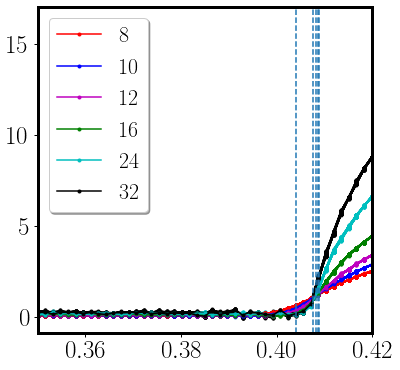

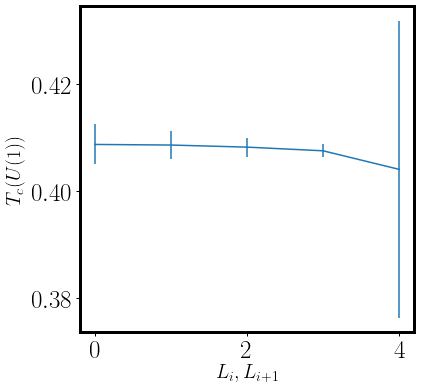

In [233]:
e=0
nu=0.55
h=1
rho=1
eta1=0
eta2=1
blow=0.35
bhigh=0.45
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L)+1)))
c_m=next(color)

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.35, 0.42)
#ax1.set_ylim((-1,1))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
        if(n==0): ax1.legend(loc='best')
        #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1] + 0*L[l1]*err_J_sum))[0]
            if(condition.size>0):
                index1=condition[-1]
                index2=index1+1
                x1= beta[index1]
                y1= Js_cross[n,index1, l1]
                x2= beta[index2] 
                y2=Js_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= Js_cross[n,index1, l2]
                y2=Js_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")

betac_finitesize=[]
err_betac_finitesize=[]

for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]), ls="--")
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("$L_{i}, L_{i+1}$")
pair_l=[]

pair_l=np.arange(0,len(L)-1, 1 )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )

8 10 0.4507761479675579
10 12 0.44882287079480143
12 16 0.44830163728177447
16 24 0.4454411468323699
24 32 0.44392795756778036
[0.33869704503150705, 0.37662706495693493, 0.3960065168916972, 0.3999672413564795, 0.40746813610741706, 0.4474539520888568] [0.0024329389143553292, 0.00044751962418349467, 0.0008985596276119891, 0.005999984246694651, 0.007429562135229486, 0.007549253046994202]


<ErrorbarContainer object of 3 artists>

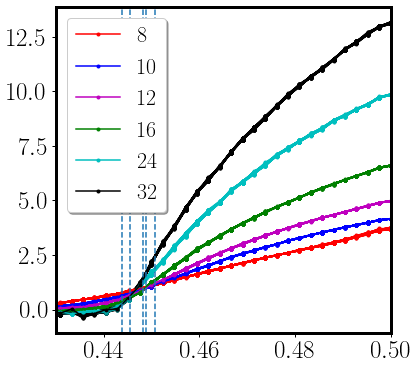

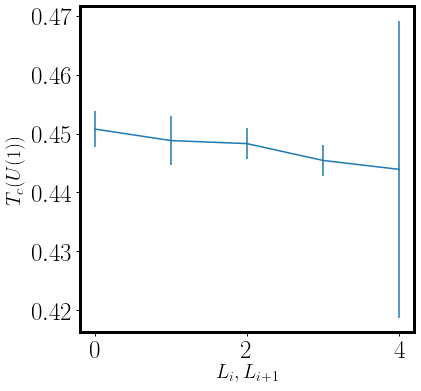

In [234]:
e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=1
blow=0.35
bhigh=0.5
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L)+1)))
c_m=next(color)

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.43, 0.5)
#ax1.set_ylim((-1,1))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
        if(n==0): ax1.legend(loc='best')
        #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1] + 0*L[l1]*err_J_sum))[0]
            if(condition.size>0):
                index1=condition[-1]
                index2=index1+1
                x1= beta[index1]
                y1= Js_cross[n,index1, l1]
                x2= beta[index2] 
                y2=Js_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= Js_cross[n,index1, l2]
                y2=Js_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")

betac_finitesize=[]
err_betac_finitesize=[]

for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]), ls="--")
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("$L_{i}, L_{i+1}$")
pair_l=[]

pair_l=np.arange(0,len(L)-1, 1 )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )

8 10 0.5287391182085627
10 12 0.5267383913799416
12 16 0.5244597259313861
16 24 0.5213044090209231
24 32 0.5204705853673812
[0.33869704503150705, 0.37662706495693493, 0.3960065168916972, 0.3999672413564795, 0.40746813610741706, 0.4474539520888568, 0.5243424459816389] [0.0024329389143553292, 0.00044751962418349467, 0.0008985596276119891, 0.005999984246694651, 0.007429562135229486, 0.007549253046994202, 0.007245583608431939]


<ErrorbarContainer object of 3 artists>

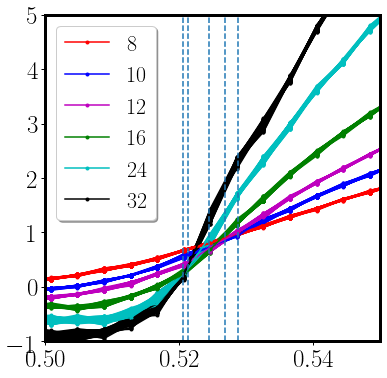

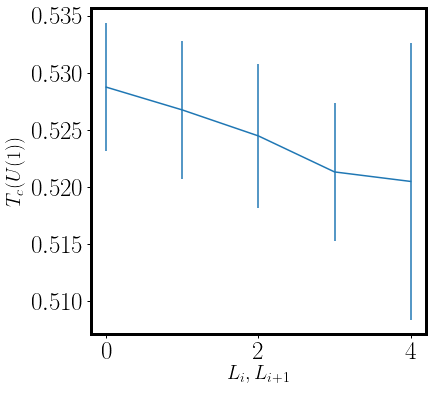

In [235]:
e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1
blow=0.35
bhigh=0.6
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L)+1)))
c_m=next(color)

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.5, 0.55)
ax1.set_ylim((-1,5))

from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
        if(n==0): ax1.legend(loc='best')
        #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1] + 0*L[l1]*err_J_sum))[0]
            if(condition.size>0):
                index1=condition[-1]
                index2=index1+1
                x1= beta[index1]
                y1= Js_cross[n,index1, l1]
                x2= beta[index2] 
                y2=Js_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= Js_cross[n,index1, l2]
                y2=Js_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")

betac_finitesize=[]
err_betac_finitesize=[]

for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]), ls="--")
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("$L_{i}, L_{i+1}$")
pair_l=[]

pair_l=np.arange(0,len(L)-1, 1 )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )

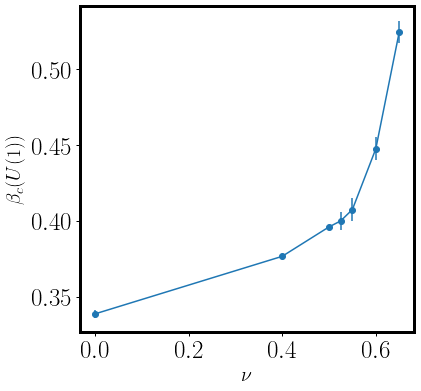

In [241]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xlabel(r"$\nu$")
ax2.set_ylabel(r"$\beta_c(U(1))$")
ax2.errorbar(nu_list,bare_Tc, yerr= bare_Tc_err, fmt="o-")

np.savetxt("%s/betac_U1.txt" %(folder_fig), (nu_list,bare_Tc, bare_Tc_err))